# Corpora Ingestion: en_50k_2018

## Overview

I downloaded this file from HermitDave's FrequencyWord repo: https://github.com/hermitdave/FrequencyWords/blob/master/content/2018/en/en_50k.txt

## Contents
* Imports & Settings
* Global Variables
* Helper Functions
* EDA
  * Read in Raw File
  * Character Count Exploration (Raw Words)
  * Identify Invalid Words
  * Cross-Check Character Counts
  * Export Valid File
  * Character Count Exploration (Valid Words)
    * Plot of Character Frequency for Valid Words
    * Plot of Character Frequency for Valid Words vs. All Words
    * Plot of Character Frequency for Valid Words vs. All Words vs. Baseline for English
* EDA Conclusions
  * Character Validity
  * Word Validity
  * Character Frequency
* Outlier Detection / Removal

## Imports & Settings

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import operator
from collections import Counter
%matplotlib inline

## Global Variables

In [126]:
valid_chars = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm'
               , 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

## Helper Functions

In [127]:
def get_char_counter(words, frequencies):
    # take a list of words and a corresponding list of frequencies
    # return a counter with the sum of characters in all words, weighted by frequency    
    counter = Counter()
    for word, frequency in zip(words, frequencies):
        new_counter = Counter(str(word))
        for _ in new_counter.keys():
            new_counter[_] = new_counter[_] * frequency
        counter.update(new_counter)
        
    return counter

def is_invalid_word(word, invalid_char_list):
    # take a word and a list of invalid chars
    # if any of the invalid chars are in the word, return false
    # else, return true
    return any(invalid_char in str(word) for invalid_char in invalid_char_list)

## Raw File EDA

### Read in Raw File

In [128]:
raw_file_path = r'D:\code_repos\LexGen\data\corpora\en_50k_2018\en_50k_2018-RAW.txt'
raw_words = pd.read_csv(raw_file_path, sep=' ', header=None, names=['word','frequency'])

In [129]:
raw_words.head()

,word,frequency
0,you,28787591
1,i,27086011
2,the,22761659
3,to,17099834
4,a,14484562


### Character Count Exploration (Raw Words)

In [130]:
char_counter = get_char_counter(raw_words['word'].tolist(), raw_words['frequency'].tolist())

In [135]:
print(char_counter.most_common())

[('e', 317758171), ('t', 252863727), ('o', 243632065), ('a', 208469923), ('i', 192792447), ('n', 177477796), ('h', 159841703), ('s', 159386595), ('r', 143335320), ('l', 114242322), ('u', 100426995), ('d', 95888458), ('y', 90697550), ('m', 74980830), ('w', 72508000), ('g', 66429118), ('c', 59766718), ('f', 45788687), ('b', 41078194), ('p', 40235384), ("'", 38976555), ('k', 36833453), ('v', 26855865), ('j', 7002669), ('x', 3367545), ('z', 1745765), ('-', 1623514), ('q', 1510497), ('.', 1430364), ('0', 114275), ('1', 88837), ('2', 56690), ('é', 52966), ('`', 34653), ('3', 31264), ('4', 25179), ('5', 24570), ('8', 23131), ('9', 22464), ('6', 17965), ('ο', 17920), ('7', 17633), ('ö', 15343), ('ñ', 10737), ('í', 8925), ('á', 7199), ('ü', 4462), ('ó', 4370), ('ç', 4166), ('è', 3892), ('ã', 3514), ('à', 2040), ('ú', 1587), ('â', 1152), ('ø', 982), ('ô', 785), ('ä', 742), ('î', 737), ('τ', 697), ('υ', 646), ('ò', 557), ('η', 553), ('ì', 532), ('ë', 498), ('ê', 469), ('ﬁ', 418), ('ﬂ', 415), ('æ'

In [132]:
good_char_counter = {k: char_counter[k] for k in valid_chars}

In [134]:
print(Counter(good_char_counter).most_common())

[('e', 317758171), ('t', 252863727), ('o', 243632065), ('a', 208469923), ('i', 192792447), ('n', 177477796), ('h', 159841703), ('s', 159386595), ('r', 143335320), ('l', 114242322), ('u', 100426995), ('d', 95888458), ('y', 90697550), ('m', 74980830), ('w', 72508000), ('g', 66429118), ('c', 59766718), ('f', 45788687), ('b', 41078194), ('p', 40235384), ('k', 36833453), ('v', 26855865), ('j', 7002669), ('x', 3367545), ('z', 1745765), ('q', 1510497)]


In [10]:
invalid_chars = [char for char in char_counter.keys() if char not in valid_chars]

In [11]:
bad_char_counter = {k: char_counter[k] for k in invalid_chars}

In [12]:
print(bad_char_counter)

{"'": 38976555, '.': 1430364, '-': 1623514, 'ö': 15343, '2': 56690, '1': 88837, '3': 31264, '0': 114275, '`': 34653, 'é': 52966, '4': 25179, 'ñ': 10737, '8': 23131, '5': 24570, '9': 22464, '7': 17633, 'ο': 17920, '6': 17965, 'ç': 4166, 'í': 8925, 'ü': 4462, 'á': 7199, 'à': 2040, 'ã': 3514, 'ó': 4370, 'è': 3892, 'ä': 742, 'η': 553, 'â': 1152, 'ø': 982, 'ú': 1587, 'ê': 469, 'υ': 646, 'ş': 366, 'İ': 328, 'ï': 320, 'ô': 785, 'ν': 308, 'τ': 697, 'ò': 557, 'û': 270, 'ì': 532, 'µ': 270, 'î': 737, 'ë': 498, 'ﬂ': 415, 'ﬁ': 418, 'æ': 373, 'å': 207, 'у': 195, 'ý': 166}


In [13]:
print(len(invalid_chars))

51


In [14]:
res = is_invalid_word('wor.d', invalid_chars)
print(res)

True


### Identify Invalid Words

In [15]:
raw_words['invalid'] = raw_words['word'].apply(is_invalid_word, invalid_char_list=invalid_chars)

In [16]:
raw_words.head()

,word,frequency,invalid
0,you,28787591,False
1,i,27086011,False
2,the,22761659,False
3,to,17099834,False
4,a,14484562,False


In [17]:
raw_words['invalid'].value_counts()

False    46717
True      3283
Name: invalid, dtype: int64

In [18]:
raw_words[raw_words['invalid']]

,word,frequency,invalid
5,'s,14291013,True
9,'t,9628970,True
25,'m,4386306,True
31,'re,4059719,True
43,'ll,2913428,True
...,...,...,...
49960,podnapisi.net,159,True
49963,word-,159,True
49985,girls-,159,True
49996,hyeon-to,159,True


### Cross-check Character Counts

In [19]:
total_chars = 0
for word, frequency in zip(raw_words['word'].tolist(), raw_words['frequency'].tolist()):
    total_chars += len(str(word)) * frequency
print(total_chars)

2777551998


In [20]:
total_chars_check = 0
for val in char_counter.values():
    total_chars_check += val
print(total_chars_check)

2777551998


In [21]:
total_chars_check2 = 0
for val in good_char_counter.values():
    total_chars_check2 += val
for val in bad_char_counter.values():
    total_chars_check2 += val
print(total_chars_check2)

2777551998


### Export Final Words

In [22]:
valid_words = raw_words[raw_words['invalid'] == False]

In [23]:
valid_words = valid_words.drop('invalid' , axis='columns')

In [24]:
valid_words.shape

(46717, 2)

In [25]:
valid_file_path = r'D:\code_repos\LexGen\data\corpora\en_50k_2018\en_50k_2018-VALID.txt'

In [26]:
valid_words.to_csv(valid_file_path, sep=' ', index=False)

### Character Count Exploration (Valid Words)

#### Plot of Character Frequency for Valid Words

In [27]:
# get a new counter based on just the valid words
valid_char_counter = get_char_counter(valid_words['word'].tolist(), valid_words['frequency'].tolist())

In [28]:
# normalize the counts
total_valid_chars = sum(valid_char_counter.values())
for key in valid_char_counter:
    valid_char_counter[key] /= total_valid_chars

In [29]:
print(valid_char_counter)

Counter({'e': 0.1161531958558534, 'o': 0.09076016436926419, 't': 0.0906851336828247, 'a': 0.07759694582055122, 'i': 0.0717795985270916, 'n': 0.06612297397577946, 'h': 0.059466435038697335, 's': 0.053956765942306084, 'r': 0.051599996443366616, 'l': 0.04033116671939905, 'u': 0.037355723132727586, 'd': 0.035213144860220105, 'y': 0.033807192970442525, 'w': 0.027023672837477475, 'm': 0.025889086732067156, 'g': 0.02475675457796143, 'c': 0.02219483472665589, 'f': 0.017013303374359367, 'b': 0.015281275746735339, 'p': 0.014973170256773576, 'k': 0.013717498624588327, 'v': 0.009275839509531576, 'j': 0.0025914415996263073, 'x': 0.0012417928447115525, 'z': 0.0006504408074716791, 'q': 0.0005624510235164438})


<BarContainer object of 26 artists>

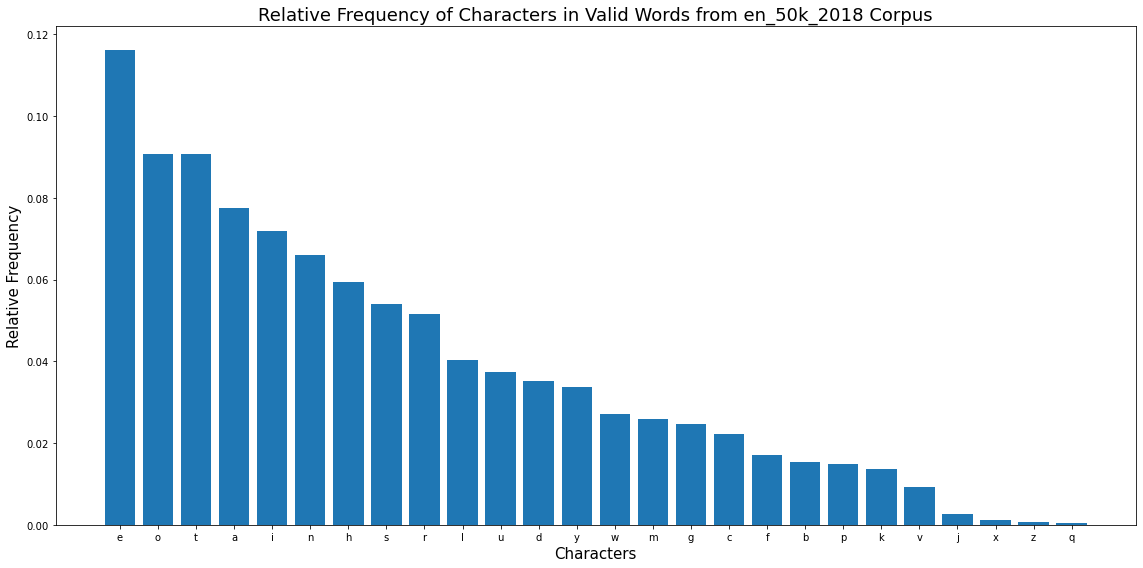

In [30]:
# print out a bar plot of the normalized count of characters from the valid words
plt.figure(figsize=(16,8))
plt.xlabel('Characters', size=15)
plt.ylabel('Relative Frequency', size=15)
plt.title('Relative Frequency of Characters in Valid Words from en_50k_2018 Corpus', size=18)
plt.tight_layout()
chars, norm_freqs = map(list, zip(*valid_char_counter.most_common()))
plt.bar(chars, norm_freqs)

#### Plot of Character Frequency for Valid Words vs. All Words

In [31]:
# normalize the counts of good characters (from valid + invalid words)
total_good_chars = sum(good_char_counter.values())
for key in good_char_counter:
    good_char_counter[key] /= total_good_chars

In [32]:
good_char_counter

{'a': 0.07622535334677435,
 'b': 0.015019911781218177,
 'c': 0.021853220514342585,
 'd': 0.03506084469042248,
 'e': 0.11618572365136695,
 'f': 0.016742265721755235,
 'g': 0.024289273575759746,
 'h': 0.058444835184810626,
 'i': 0.07049301013635557,
 'j': 0.002560469688932072,
 'k': 0.013467856319526754,
 'l': 0.04177178768184211,
 'm': 0.02741613839894026,
 'n': 0.0648933309737287,
 'o': 0.08908210821965573,
 'p': 0.014711745072420597,
 'q': 0.000552301098869992,
 'r': 0.05240940878590421,
 's': 0.058278428599094455,
 't': 0.09245759130038766,
 'u': 0.03672032430035359,
 'v': 0.00981963138662583,
 'w': 0.0265119679660836,
 'x': 0.0012313157881108981,
 'y': 0.033162830862832594,
 'z': 0.0006383249538852256}

In [59]:
x = []
for key in valid_char_counter:
    x.append((key, valid_char_counter[key], good_char_counter[key]))
x.sort()
x, valid_chars, good_chars = map(list, zip(*x))
x_labels = x
x = np.arange(26)

<ipython-input-71-2af0e3673c00>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = plt.subplot(111)


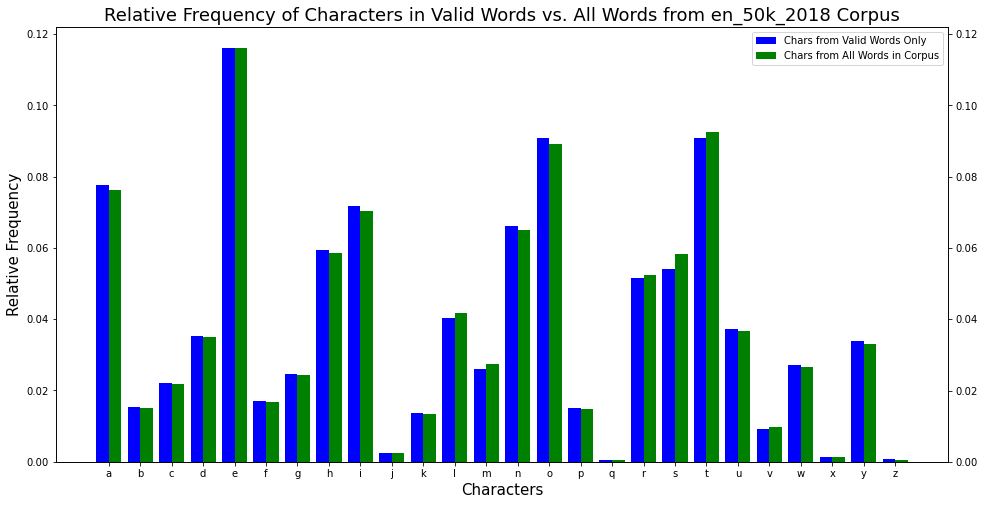

In [71]:
# print out a bar plot of the normalized count of characters from the valid words
plt.figure(figsize=(16,8))
plt.xlabel('Characters', size=15)
plt.ylabel('Relative Frequency', size=15)
plt.title('Relative Frequency of Characters in Valid Words vs. All Words from en_50k_2018 Corpus', size=18)
ax1 = plt.subplot(111)
w = 0.4
plt.xticks(x + w /2, x_labels)
valid = ax1.bar(x, valid_chars, width=w, color='b', align='center')
ax2=ax1.twinx()
good = ax2.bar(x+w, good_chars, width=w, color='g', align='center')
plt.legend([valid, good],['Chars from Valid Words Only', 'Chars from All Words in Corpus'])
plt.show()


(array([ 1.,  0.,  0.,  0.,  3.,  1.,  1., 12.,  4.,  4.]),
 array([-0.00432166, -0.00372169, -0.00312172, -0.00252175, -0.00192178,
        -0.0013218 , -0.00072183, -0.00012186,  0.00047811,  0.00107808,
         0.00167806]),
 <BarContainer object of 10 artists>)

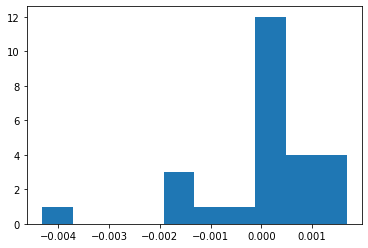

In [97]:
differences = list(map(operator.sub, valid_chars, good_chars))
plt.hist(differences)

In [114]:
print(f'''    Min Nom Difference: {min(differences)}
    Max Nom Difference: {max(differences)}
    Mean Nom Difference: {np.average(differences)}
    Median Nom Difference: {np.median(differences)}
    StDev of Nom Differences: {np.std(differences)}
    ''')

    Min Nom Difference: -0.004321662656788371
    Max Nom Difference: 0.0016780561496084617
    Mean Nom Difference: 2.7522055147708957e-19
    Median Nom Difference: 0.0002555031352893672
    StDev of Nom Differences: 0.0012057341819267076
    


(array([ 1.,  0.,  2.,  0.,  1.,  0.,  2.,  0.,  3., 17.]),
 array([-0.08009492, -0.07017943, -0.06026395, -0.05034847, -0.04043299,
        -0.0305175 , -0.02060202, -0.01068654, -0.00077105,  0.00914443,
         0.01905991]),
 <BarContainer object of 10 artists>)

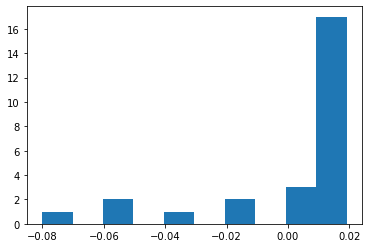

In [99]:
rel_differences = list(map(operator.truediv, differences, valid_chars))
plt.hist(rel_differences)

In [115]:
print(f'''    Min Rel Difference: {min(rel_differences)}
    Max Rel Difference: {max(rel_differences)}
    Mean Rel Difference: {np.average(rel_differences)}
    Median Rel Difference: {np.median(rel_differences)}
    StDev of Rel Differences: {np.std(rel_differences)}
    ''')

    Min Rel Difference: -0.08009491638934328
    Max Rel Difference: 0.019059911545252908
    Mean Rel Difference: 0.0015495567546582848
    Median Rel Difference: 0.017056477075563393
    StDev of Rel Differences: 0.028066991651253256
    


#### Plot of Character Frequency for Valid Words vs. All Words vs. Baseline for English

Source: https://en.wikipedia.org/wiki/Letter_frequency

In [85]:
en_char_freq_file = r'D:\code_repos\LexGen\data\ref\en_char_fequency.csv'
en_char_freq = pd.read_csv(en_char_freq_file)

In [87]:
baseline_chars = list(en_char_freq['texts'])

<ipython-input-89-1ae928b68d8e>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = plt.subplot(111)


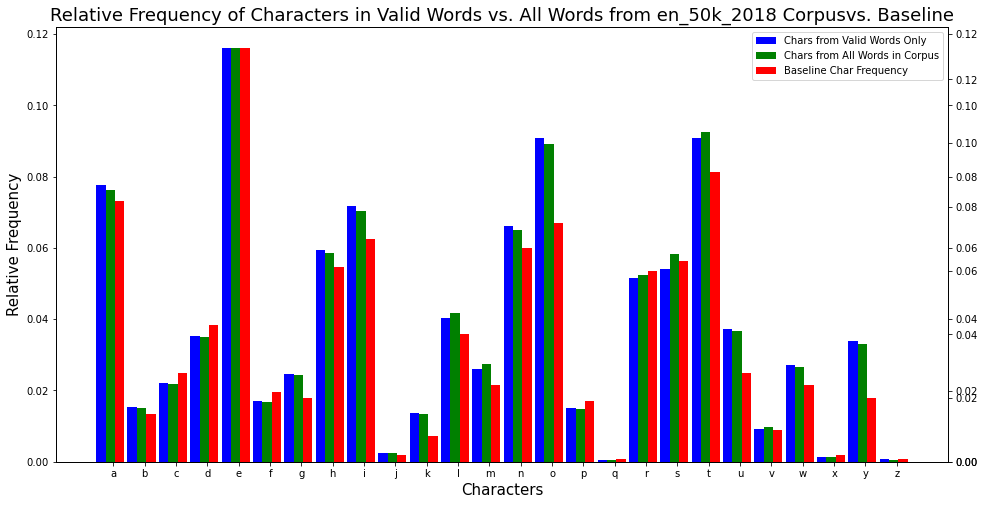

In [89]:
# print out a bar plot of the normalized count of characters from the valid words
plt.figure(figsize=(16,8))
plt.xlabel('Characters', size=15)
plt.ylabel('Relative Frequency', size=15)
plt.title('Relative Frequency of Characters in Valid Words vs. All Words from en_50k_2018 Corpusvs. Baseline', size=18)
ax1 = plt.subplot(111)
w = 0.3
plt.xticks(x + w /3, x_labels)
valid = ax1.bar(x-w, valid_chars, width=w, color='b', align='center')
ax2=ax1.twinx()
good = ax2.bar(x, good_chars, width=w, color='g', align='center')
ax3=ax1.twinx()
baseline=ax3.bar(x+w, baseline_chars, width=w, color='r', align='center')
plt.legend([valid, good, baseline],['Chars from Valid Words Only', 'Chars from All Words in Corpus', 'Baseline Char Frequency'])
plt.show()

(array([ 1.,  2.,  3.,  2., 10.,  3.,  2.,  1.,  0.,  2.]),
 array([-0.0138468 , -0.01088611, -0.00792541, -0.00496471, -0.00200402,
         0.00095668,  0.00391738,  0.00687807,  0.00983877,  0.01279947,
         0.01576016]),
 <BarContainer object of 10 artists>)

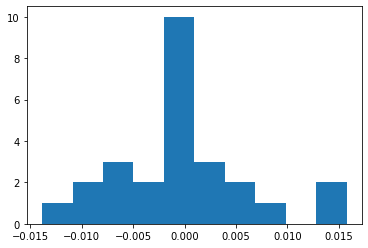

In [120]:
baseline_differences = list(map(operator.sub, valid_chars, baseline_chars))
plt.hist(baseline_differences)

(array([1., 1., 1., 0., 4., 4., 7., 3., 3., 2.]),
 array([-0.77793258, -0.65845899, -0.53898541, -0.41951182, -0.30003823,
        -0.18056464, -0.06109106,  0.05838253,  0.17785612,  0.29732971,
         0.41680329]),
 <BarContainer object of 10 artists>)

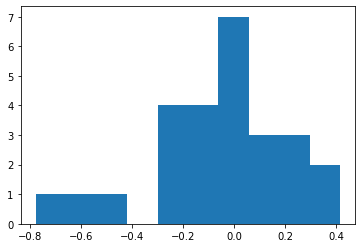

In [121]:
baseline_rel_differences = list(map(operator.truediv, baseline_differences, valid_chars))
plt.hist(baseline_rel_differences)

In [122]:
print(f'''    Min Rel Difference: {min(baseline_rel_differences)}
    Max Rel Difference: {max(baseline_rel_differences)}
    Mean Rel Difference: {np.average(baseline_rel_differences)}
    Median Rel Difference: {np.median(baseline_rel_differences)}
    StDev of Rel Differences: {np.std(baseline_rel_differences)}
    ''')

    Min Rel Difference: -0.7779325811303532
    Max Rel Difference: 0.41680329490537227
    Mean Rel Difference: -0.06506354668381784
    Median Rel Difference: -0.01952615438677218
    StDev of Rel Differences: 0.28096853775508007
    


# EDA Conclusion

## Character Validity

I started with 50,000 words. I examined them to see if I had any invalid characters, and found that I had 51. Some of these were very common, e.g. ' (single quote) occurred 38,976,555 times. This makes it the 21st most-common character, more common than 5 actual letters. This is an important finding, because it illustrates that automatic detection of valid characters can't be based on a naive split based on frequency. A lot of invalid characters are very rare (ý appears only 165 times), but as long as some are more common than valid characters, we won't be able to trivially automate the process of identifying them (e.g. in other languages).

Another note: some of the invalid characters are indistinguishable from valid characters, e.g. y (valid) vs. у (invalid). I presume there's a difference under the hood (different character codes), but I can't spot any visual difference at all. 

## Word Validity

I decided to remove any words that 1 or more invalid characters. I removed 3,283 words that way, leaving a total of 46,717 words (from the original sample of 50k). I output the new list as the file: en_50k_2018-VALID.txt (space-separate as the original file, but with a header this time).

## Character Frequency

I compared relative character frequency (valid characters only) from the following sets:
1. All Words
2. All Valid Words
3. Baseline Character Frequency (from Wikipedia)

I found that there are some pretty significant differences, especially in the change in relative frequency between the All Valid Words set and the Baseline set. In general, the All Valid Words set had slightly higher frequency for many characters and much lower frequency for a small population of characters. 

My only real conclusion to this fact is the observation that character frequency *does* change significantly within a given language from corpus to corpus. I suspect the nature of subtitles is sufficiently different from the texts used to generate the baseline character occurrence rates (probably fiction and/or non-fiction prose) to explain this difference. In particular, the word 'you' is the most common in the data set (by far) and the letters 'y', 'o', and 'u' are all in the small set that are significantly overrepresented in the All Valid Words set vs. the baseline. If this is the case, than simply removing 'you' (and maybe some additional outliers) would bring the character frequencies closer together.

It's also possible that restricing to just the top 50k words is skewing the results. I'm thinking about starting over with the full data set, but I want to finish up what I've got so far first.

# Outlier Detection / Removal

In [137]:
valid_words.head()

,word,frequency
0,you,28787591
1,i,27086011
2,the,22761659
3,to,17099834
4,a,14484562


In [144]:
valid_words.dtypes

word         object
frequency     int64
dtype: object

<AxesSubplot:>

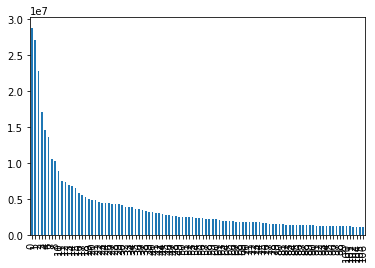

In [157]:
valid_words['frequency'].head(100).plot.bar()

<AxesSubplot:>

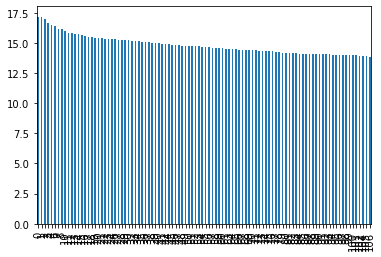

In [159]:
valid_words['frequency'].apply(np.log).head(100).plot.bar()

In [ ]:
valid_words['frequency']